import pandas as pd 
import geopandas
pools= pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")

pools.head()

read in data set 
shows top responses

query_mask= pools['type'] != "Spray Park"
pools= pools[query_mask]
pools.head()

gets rid of all Spray parks so only pools are used

In [7]:
pools.sort_values('capacity', ascending=False)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
8,9,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
14,15,2077053611,Moore,Pool,NaN,Pennsylvania American Water,417657.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brookline,4,19,42003191700,5,19,6,4-26,40.405591,-80.013517
18,19,43656340,Ream,Pool,NaN,Pittsburgh Water and Sewer Authority,356000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Mount Washington,2,19,42003190300,5,19,3,4-27,40.430836,-80.013115
3,4,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
21,22,976230017,Sheraden,Pool,NaN,Pennsylvania American Water,278000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Sheraden,2,20,42003562500,5,20,6,1-16,40.457104,-80.059850
22,23,927599833,Sue Murray,Pool,NaN,Pittsburgh Water and Sewer Authority,271000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451290,-80.001507
17,18,1704750315,Phillips - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,224100.0,https://tools.wprdc.org/images/pittsburgh/pool...,Carrick,4,29,42003290400,3,29,3,4-23,40.392053,-79.991106
24,25,558965267,West Penn,Pool,NaN,Pittsburgh Water and Sewer Authority,215451.0,https://tools.wprdc.org/images/pittsburgh/pool...,Polish Hill,7,6,42003060500,6,6,2,2-6,40.455284,-79.969930
10,11,2092220498,Jack Stack,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486892,-80.030635


sorts from largest to smallest capacity

In [1]:
pools.plot(kind='bar', x='neighborhood', y='capacity')

NameError: name 'pools' is not defined

plots all pools and capacity with corresponding neighborhood into a bar graph

there was a problem with repitition as some neighborhoods have multiple pool locations

In [10]:
combined= pools.groupby("neighborhood")["capacity"].sum()

In [11]:
combined

neighborhood
Allegheny Center       271000.0
Banksville             166320.0
Bedford Dwellings      538000.0
Bloomfield             335000.0
Brighton Heights       205800.0
Brookline              417657.0
Carrick                224100.0
Greenfield             195000.0
Highland Park          560242.0
Homewood South         171075.0
Lincoln Place           18000.0
Mount Washington       356000.0
Perry North            205800.0
Polish Hill            215451.0
Sheraden               278000.0
South Side Flats       312800.0
Squirrel Hill South    187600.0
Westwood               156840.0
Name: capacity, dtype: float64

added all pools together if a neighborhood had multiple pools

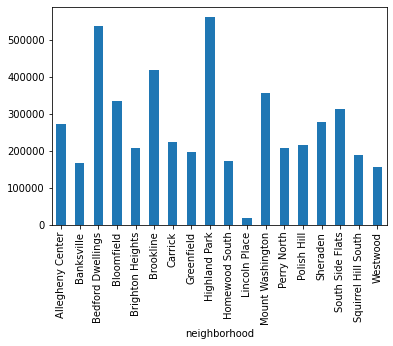

In [12]:
combined.plot(kind='bar')

created a bargraph for the combined values

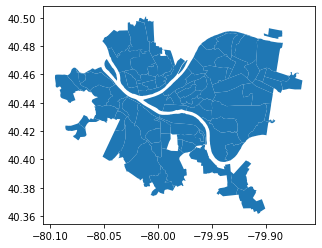

In [16]:
neighborhood= geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip")
neighborhood.plot()                     

imported geoplot of pittsburgh neighborhoods

In [19]:
pools_map= neighborhood.merge(combined, how='left', left_on= 'hood', right_on= 'neighborhood')
pools_map.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,capacity
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",NaN
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",NaN
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",NaN
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",538000.0
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",NaN


created variable pools_map that defined/merged x and y variables (combined capacity and neighborhood) for geo plot

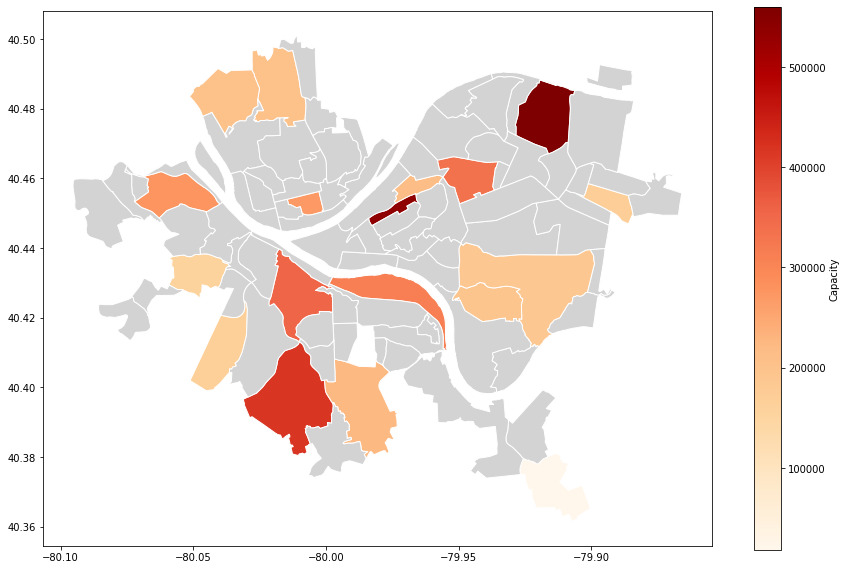

In [24]:
pools_map.plot(column= 'capacity', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Capacity"}, figsize=(15, 10), missing_kwds={"color" : "lightgrey"})


In [ ]:
geoplotted the values
